# Graphs

In the following notebooks, we will delve into the topic of graph neural networks. But to do so, we first have to understand the data that GNNs deal with. So, what are graphs?

Here, we will cover some of the basics, including essential terminology and Python toolkits. For an easy-to-read deep dive into graph theory, I recommend the book Graph Theory by Robin J. Wilson.

The essential Python library needed for dealing with graph data is [networkx](https://networkx.org/). You can find more [tutorials](https://networkx.org/documentation/stable/tutorial.html) on their homepage.

As a first example, let's plot the so-called karate club data set. We will have a closer look at this dataset in the next notebook. As you can see from the code, the dataset is built into Networkx. Moreover, as you can see from the code, you can plot graphs using **nx.draw()** and when you do so, it internally uses **matplotlib.pyplot** to create the plot, which implies that you can use matplotlib commands to adjust the plots.

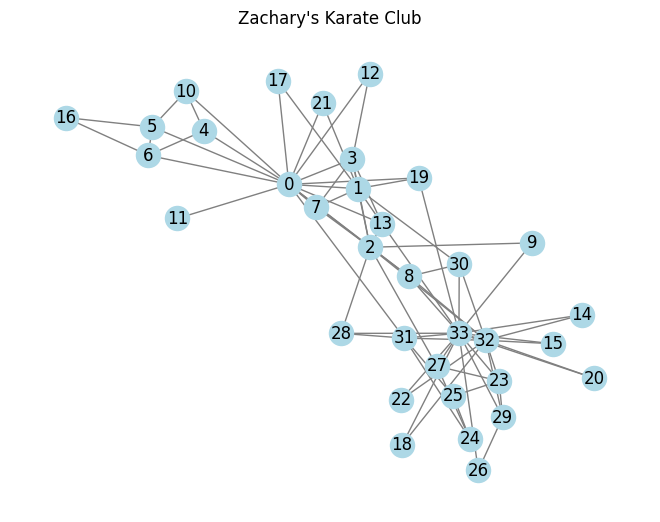

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the Zachary's Karate Club graph (built-in dataset in NetworkX)
G = nx.karate_club_graph()

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', pos=nx.spring_layout(G))
plt.title("Zachary's Karate Club")
plt.show()

So, what does this plot represent? Here, each point in the graph (each circle with a number) is called a node or vertex. In the concrete example, each vertex represents a person who is a member of a karate club. Vertices are connected through edges (the lines between the points). Here, the vertices represent the social relations between individual members of the karate club (who knows whom).

So far so good, but what if I wanted to create my own graph? Say, I had ten people who each knew three other people. We could create a graph of this social network by creating the so-called adjacency matrix. Each row and column in this matrix corresponds to a person in the network, and the entries indicate whether there is a connection (an edge) between two individuals. More specifically, the entries in row x would represent the people that person x knows. For the sake of argument, let's just declare such a matrix brute force.

In [12]:
# Define the adjacency matrix
adj_matrix = np.array([
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
])

Note that the elements of the diagonal are all set to zero because we do not consider people to have connections to themselves. Of course, depending on the phenomenon you are modelling (e.g., biological networks, transportation networks), you could very well have self-interactions/loops. Okay, let's plot the graph.

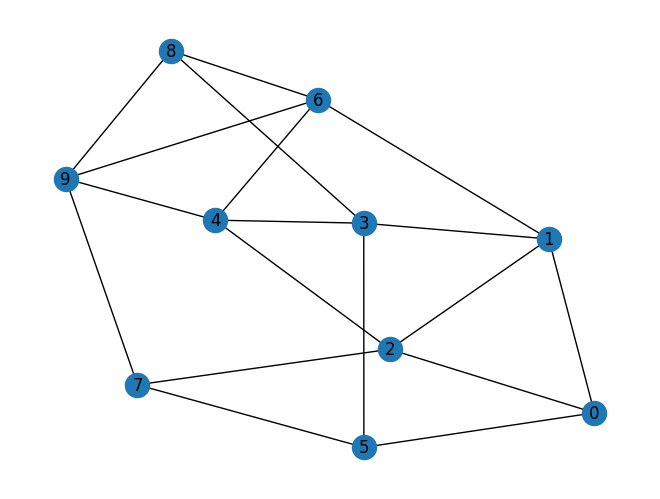

In [13]:
# Create a graph from the adjacency matrix
#G = nx.from_numpy_matrix(adj_matrix) in older version
G = nx.from_numpy_array(adj_matrix)

# Draw the graph
nx.draw(G, with_labels=True)

For each node, we can compute different properties. For instance, the number connections, the so-called degree of each node.

In [14]:
# Compute the degree of each node
node_degrees = dict(G.degree())

# Print the degree of each node
for node, degree in node_degrees.items():
    print(f"Node {node}: Degree {degree}")

Node 0: Degree 3
Node 1: Degree 4
Node 2: Degree 4
Node 3: Degree 4
Node 4: Degree 4
Node 5: Degree 3
Node 6: Degree 4
Node 7: Degree 3
Node 8: Degree 3
Node 9: Degree 4


In our present example, vertices are either connected or they are not. The entries of the adjacency matrix are either 0 or 1. But, of course, connections might vary in intensity. Imagine, for instance, that you are modelling an electric network, and each vertex represents different elements/locations connected through electrical wires. The wires could have different resistance or just be placed at different distances. You can indicate this by using weights in the adjacency matrix. Instead of using just 0 or 1 to represent the absence or presence of a connection, we can use numerical values to represent the intensity, distance, cost, or some other metric associated with the connection between vertices.

Let's modify the electric network example to include weights in the adjacency matrix:

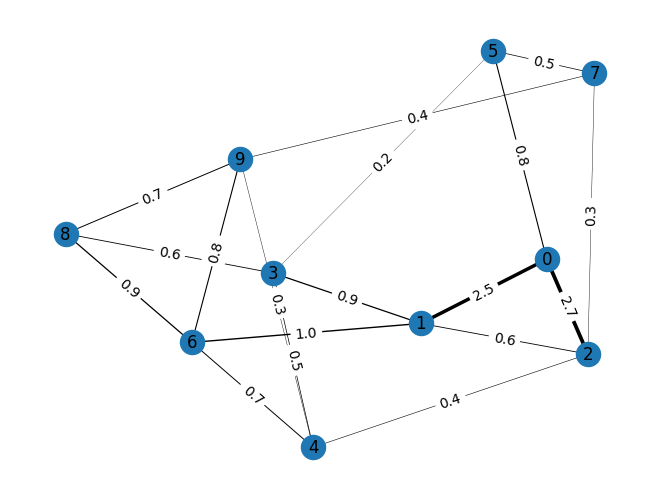

In [15]:
# Define the weighted adjacency matrix
weighted_adj_matrix = np.array([
    [0, 2.5, 2.7, 0, 0, 0.8, 0, 0, 0, 0],
    [2.5, 0, 0.6, 0.9, 0, 0, 1, 0, 0, 0],
    [2.7, 0.6, 0, 0, 0.4, 0, 0, 0.3, 0, 0],
    [0, 0.9, 0, 0, 0.5, 0.2, 0, 0, 0.6, 0],
    [0, 0, 0.4, 0.5, 0, 0, 0.7, 0, 0, 0.3],
    [0.8, 0, 0, 0.2, 0, 0, 0, 0.5, 0, 0],
    [0, 1, 0, 0, 0.7, 0, 0, 0, 0.9, 0.8],
    [0, 0, 0.3, 0, 0, 0.5, 0, 0, 0, 0.4],
    [0, 0, 0, 0.6, 0, 0, 0.9, 0, 0, 0.7],
    [0, 0, 0, 0, 0.3, 0, 0.8, 0.4, 0.7, 0]
])

# Create a graph from the weighted adjacency matrix
G_weighted = nx.from_numpy_array(weighted_adj_matrix)

# Draw the graph with edge weights indicated by the width of the lines
edge_weights = nx.get_edge_attributes(G_weighted, 'weight').values()
pos = nx.spring_layout(G_weighted)  # Position nodes using Fruchterman-Reingold force-directed algorithm

nx.draw(G_weighted, pos, with_labels=True, width=list(edge_weights))

# Draw edge labels
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels)

plt.show()

In [16]:
# Compute the degree of each node
node_degrees = dict(G_weighted.degree())
weighted_node_degrees = dict(G_weighted.degree(weight='weight'))

# Print the weighted degree of each node
for node, weighted_degree in weighted_node_degrees.items():
    formatted_weighted_degree = "{:.2f}".format(weighted_degree)
    print(f"Node {node}: Degree {degree} Weighted Degree {formatted_weighted_degree}")

Node 0: Degree 4 Weighted Degree 6.00
Node 1: Degree 4 Weighted Degree 5.00
Node 2: Degree 4 Weighted Degree 4.00
Node 3: Degree 4 Weighted Degree 2.20
Node 4: Degree 4 Weighted Degree 1.90
Node 5: Degree 4 Weighted Degree 1.50
Node 6: Degree 4 Weighted Degree 3.40
Node 7: Degree 4 Weighted Degree 1.20
Node 8: Degree 4 Weighted Degree 2.20
Node 9: Degree 4 Weighted Degree 2.20


<font color='red'><b>Exercise 1:</b></font> Construct your own dataset. For this purpose, consider the case where you have a set of data points at random Euclidean distances, -d_{ij}. Define the entrances of the adjacency matrix as

$$
A_{ij} = s(d_{ij}) = e^{-d_{ij}} \, ,
$$

Set the diagonal terms to zero and define a cutoff below which $A_{ij}$ is set to zero, i.e., locations that are too far apart are not connected.

<font color='red'><b>Exercise 2:</b></font> Node centrality refers to the importance or prominence of a node within a network. It quantifies how influential or central a node is based on its structural position and interactions with other nodes. Various centrality measures exist, including degree centrality (based on the number of connections), betweenness centrality (based on shortest paths), and eigenvector centrality (based on connections to other central nodes). These measures help identify key nodes in networks, facilitating analysis of network structure, information flow, and node influence. Compute node centrality measures for the karate club data set.

<font color='red'><b>Exercise 3:</b></font> Find out how to plot the graph for the karate club dataset so as to indicate the degree of the node through the its colour.

## Laplacians and Eigenvalues

The Laplacian ($L$) of a graph is a square matrix that provides insights into various properties of the graph. It is used to study graph connectivity, spectral properties of the graph, random walks on graphs, and graph partitioning algorithms, among other things. It is defined as

$$
L = D- A,
$$

where $D$ is a diagonal matrix where each diagonal entry represents the degree of the corresponding vertex, and $A$ is the adjacency matrix.

In [17]:
# Let's recompute the weighted degree but this time without inbuild functions
weighted_degrees = weighted_adj_matrix.sum(axis=1)
D = np.diag(weighted_degrees)
L = D - weighted_adj_matrix

Now, you could for instance find the number of connected components. Connected components are subgraphs within a larger graph where every vertex is reachable from every other vertex in the same subgraph, either directly or indirectly through edges.

In [18]:
# 1. Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# 2. Compute the number of connected components
num_connected_components = np.sum(eigenvalues < 1e-10)  # Considering small eigenvalues as zero
print("Number of connected components:", num_connected_components)

Number of connected components: 1


<font color='red'><b>Exercise 3:</b></font> Here, the number of connected components are 1. What does that mean?

<font color='red'><b>Exercise 4:</b></font> Construct a graph where the number of connected components is 2.

You might also be interested in computing the symmetric normalized Laplacian. It's valuable in spectral graph theory, aiding in spectral clustering, community detection, and analyzing graph connectivity. It is defined as

$$
\boldsymbol L = \boldsymbol I - \boldsymbol D^{-1/2}\boldsymbol A \boldsymbol D^{-1/2}
$$

Let's compute the symmetric normalized Laplacian while also seeing how we might get the adjacency matrix if we already have the graph by other means.

In [19]:
# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])

# Compute the adjacency matrix
A = nx.adjacency_matrix(G).toarray()

# Compute the degree matrix
degrees = np.sum(A, axis=1)
D_sqrt_inv = np.diag(1 / np.sqrt(degrees))

# Compute the symmetric normalized Laplacian matrix
L_sym = np.identity(len(G.nodes)) - D_sqrt_inv @ A @ D_sqrt_inv

print("Symmetric Normalized Laplacian Matrix:")
print(L_sym)

Symmetric Normalized Laplacian Matrix:
[[ 1.         -0.40824829 -0.40824829  0.        ]
 [-0.40824829  1.         -0.33333333 -0.40824829]
 [-0.40824829 -0.33333333  1.         -0.40824829]
 [ 0.         -0.40824829 -0.40824829  1.        ]]


In this course, our main interest in graphs lies in the fact that they are a data structure used for certain neural network architectures: GNNs. Understanding Eigenvalues and Laplacians of graphs is not important for constructing GNNs. The point of discussing these terms is merely to illustrate that graph theory is a broad topic with various tools that allow you to explore your data _before_ you continue to learn patterns using GNNs. Becoming more familiar with various aspects of graph theory can hence be beneficial when engaging with GNNs within Deep Learning.

## Directed graphs

In the graphs above, we have presented graphs where each edge represented an undirected connection between the vertices. Two people know _each other_. Or there is a power cable between two houses. But, of course, not all associations are undirected. Sometimes, there is only a one-way relationship, e.g., if we are describing causal effects. Imagine, for instance, that we are treating plants against mould and aim to evaluate the impact of the treatment on plant growth. In that case, there is a clear direction: Treatment _affects_ plant growth.

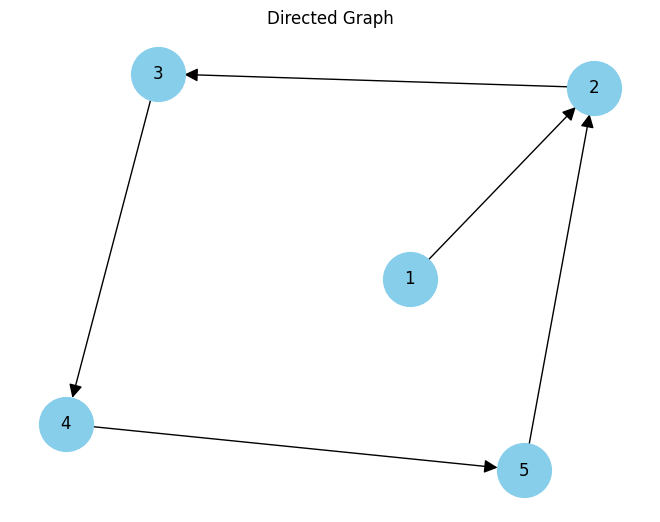

In [20]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4, 5])

# Add edges
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 5), (5, 2)])

# Plot the directed graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, arrowsize=20)
plt.title("Directed Graph")
plt.show()

<font color='red'><b>Exercise 6:</b></font> Create your own example of a causal phenomon. Include more than one cause (that might affect each other). Plot the corresponding directed graph.